# Collaborative Filtering-based Model

## Neighborhood Model

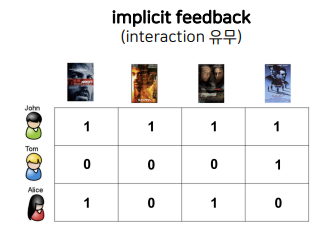

### 유저 기반

input = 행 - 사용자, 열 - 영화, 값 - 평점

output = 사용자를 기준으로 유사한 사용자를 기반으로 하여 영화를 추천

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
movie_paths = '/content/drive/MyDrive/추천/data/movies/'

movie = pd.read_csv(movie_paths + "ratings.csv")
meta = pd.read_csv(movie_paths + 'movies_metadata.csv', low_memory=False)
meta = meta.rename(columns={'id':'movieId'})

movie['movieId'] = movie['movieId'].astype(str)
meta['movieId'] = meta['movieId'].astype(str)

movie = pd.merge(movie, meta[['movieId', 'original_title']], on='movieId')
movie.head()

,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III


In [ ]:
id2title = {}
title2id =  {}

for title, movieId in zip(movie['original_title'], movie['movieId']):
  id2title[movieId] = title
  title2id[title] = movieId

In [ ]:
idx = title2id['Spider-Man 2']

In [ ]:
user_base = movie.pivot_table(index='userId', columns = 'movieId', values = 'rating').fillna(0)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
CF = cosine_similarity(user_base, user_base)

CF = pd.DataFrame(CF)

CF.index = user_base.index
CF.columns = user_base.index

CF.head()

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.000000,0.111740,0.045325,0.000000,0.086490,0.000000,0.032783,0.000000,0.000000,0.000000,0.000000,0.000000,0.071269,0.000000,0.034227,0.000000,0.037557,0.000000,0.038273,0.024563,0.000000,0.000000,0.031046,0.008707,0.000000,0.000000,0.000000,0.028411,0.000000,0.000000,0.026469,0.069263,0.221793,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.192117,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.101221,0.000000,0.052842,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.009864,0.019835,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,1.000000,0.172900,0.118982,0.105927,0.000000,0.231172,0.104280,0.116057,0.030537,0.052084,0.037455,0.172195,0.000000,0.171843,0.038412,0.071566,0.055953,0.268472,0.228920,0.202110,0.180975,0.168400,0.249213,0.000000,0.102100,0.111028,0.023069,0.000000,0.212831,0.060590,0.467765,0.008785,0.104402,0.056084,0.356193,0.035815,0.152837,0.247376,0.000000,...,0.189478,0.444176,0.018088,0.109337,0.030110,0.000000,0.000000,0.364601,0.054521,0.358967,0.011426,0.000000,0.078427,0.042366,0.108901,0.142976,0.082853,0.580094,0.077104,0.000000,0.092570,0.197608,0.288885,0.080703,0.017538,0.364068,0.268140,0.410457,0.028742,0.045788,0.472035,0.141222,0.095300,0.247965,0.474999,0.514490,0.093228,0.044339,0.173073,0.109078
3,0.000000,0.172900,1.000000,0.065062,0.138674,0.000000,0.186351,0.305685,0.251273,0.140265,0.203351,0.095581,0.273498,0.090567,0.168436,0.117627,0.230167,0.000000,0.141914,0.261753,0.113236,0.234655,0.201617,0.150036,0.056093,0.323469,0.269160,0.061812,0.214477,0.191809,0.383895,0.148821,0.056043,0.173783,0.056353,0.171260,0.095049,0.320959,0.152108,0.167290,...,0.457783,0.198638,0.138476,0.313322,0.061468,0.094487,0.095034,0.224273,0.000000,0.119542,0.000000,0.281006,0.087487,0.000000,0.080035,0.166211,0.183835,0.180996,0.000000,0.145250,0.046786,0.171063,0.220387,0.166498,0.058180,0.236644,0.293252,0.166036,0.048898,0.149950,0.192807,0.099797,0.261200,0.215030,0.202532,0.132969,0.234504,0.106074,0.224741,0.206307
4,0.111740,0.118982,0.065062,1.000000,0.150233,0.095480,0.257316,0.139444,0.037562,0.042169,0.047777,0.044334,0.136463,0.012966,0.271004,0.024864,0.145663,0.036218,0.250437,0.112031,0.254595,0.195233,0.157932,0.091644,0.060980,0.093488,0.054757,0.051197,0.000000,0.281944,0.114180,0.172571,0.112645,0.186496,0.065346,0.077123,0.063587,0.110368,0.071644,0.029541,...,0.057274,0.174381,0.113474,0.100559,0.065338,0.036522,0.027550,0.107418,0.082971,0.144993,0.028175,0.091907,0.010609,0.116768,0.289766,0.151996,0.089203,0.138479,0.006519,0.132561,0.108505,0.092659,0.347745,0.101594,0.088569,0.089438,0.095068,0.124158,0.047251,0.024087,0.098178,0.056254,0.131530,0.256273,0.119800,0.108244,0.102466,0.121362,0.009076,0.146577
5,0.045325,0.105927,0.138674,0.150233,1.000000,0.076042,0.134511,0.201534,0.094029,0.064509,0.026257,0.052451,0.157746,0.138843,0.220570,0.078957,0.072902,0.044494,0.146392,0.163455,0.115469,0.156297,0.236486,0.052275,0.076954,0.088175,0.096618,0.014537,0.000000,0.222909,0.060094,0.166250,0.070295,0.124624,0.000000,0.068823,0.091708,0.104348,0.084024,0.000000,...,0.078255,0.188976,0.056450,0.065264,0.043369,0.029629,0.000000,0.161292,0.127143,0.201646,0.000000,0.033891,0.065626,0.149358,0.229219,0.057205,0.215303,0.184311,0.033846,0.064525,0.066882,0.275139,0.333700,0.176331,0.154932,0.084650,0.129926,0.133325,0.036799,0.000000,0.228081,0.000000,0.140585,0.237052,0.155886,0.069493,0.000000,0.000000,0.073629,0.206709


In [ ]:
def getCF(userId):

  my_df = movie[movie['userId'] == userId]
  my_df = my_df['original_title'].values.tolist()

  recommend_ldx = CF.loc[userId, :].sort_values(ascending = False)[ :10].index.tolist()[1]

  recommend_df = movie[movie['userId'] == recommend_ldx]
  recommend_df = recommend_df['original_title'].values.tolist()

  print(f'=====My({userId}) Movie List=====')
  print(*my_df, sep='\n')
  print()
  print(f'=====Most similar User({recommend_ldx}) List=====')
  print(*recommend_df, sep='\n')

In [ ]:
getCF(1)

=====My(1) Movie List=====
Rocky III
Greed
American Pie
My Tutor
Jay and Silent Bob Strike Back
Vivement dimanche!

=====Most similar User(325) List=====
Rocky III
My Tutor
Monsters, Inc.
Tuya de hun shi
Underworld
The Great Dictator
28 Weeks Later
Back to the Future
Frankenstein Unbound


### 아이템 기반

input = 행 - 영화, 열 - 사용자, 값 - 평점

output = 영화를 기준으로 평점이 유사한 영화를 기반으로 추천

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
movie_paths = '/content/drive/MyDrive/추천/data/movies/'

movie = pd.read_csv(movie_paths + "ratings.csv")
meta = pd.read_csv(movie_paths + 'movies_metadata.csv', low_memory=False)
meta = meta.rename(columns={'id':'movieId'})

movie['movieId'] = movie['movieId'].astype(str)
meta['movieId'] = meta['movieId'].astype(str)

movie = pd.merge(movie, meta[['movieId', 'original_title']], on='movieId')
movie.head()

,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III


In [ ]:
id2title = {}
title2id =  {}

for title, movieId in zip(movie['original_title'], movie['movieId']):
  id2title[movieId] = title
  title2id[title] = movieId

In [ ]:
idx = title2id['Spider-Man 2']

In [ ]:
item_base = movie.pivot_table(index='movieId', columns = 'userId', values = 'rating').fillna(0)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
CBF= cosine_similarity(item_base, item_base)

CBF = pd.DataFrame(CBF)

CBF.index = item_base.index
CBF.columns = item_base.index

CBF.head()

movieId,100,100017,100032,100272,100450,101,101362,1018,101904,102,102165,1023,1024,103,103048,103210,103299,103502,103539,103688,103731,104,1040,104211,104241,104374,104863,1049,105,1050,1051,105121,105246,105254,105593,105763,1059,106417,107,107081,...,956,957,95744,95752,95949,95963,96,961,962,963,964,965,966,968,96821,97,97593,976,97936,97938,98,980,981,98122,982,98369,984,98491,986,98604,987,988,99,990,991,99106,992,994,996,99846
movieId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100,1.0,0.0,0.0,0.0,0.0,0.086712,0.000000,0.099687,0.0,0.07711,0.0,0.043202,0.0,0.340909,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.062243,0.0,0.000000,0.000000,0.000000,0.0,0.187916,0.12219,0.081759,0.0,0.0,0.0,0.0,0.0,0.0,0.100710,0.0,0.197315,0.0,...,0.047324,0.0,0.0,0.0,0.0,0.0,0.0,0.307729,0.082572,0.0,0.102418,0.0,0.0,0.000000,0.0,0.0,0.0,0.082572,0.0,0.000000,0.0,0.0,0.0,0.000000,0.08547,0.0,0.240296,0.0,0.094704,0.0,0.0,0.000000,0.0,0.0,0.143825,0.0,0.102418,0.133132,0.078507,0.0
100017,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,0.000000,0.000000,0.251602,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.00000,0.0,0.624695,0.0,0.000000,0.0,0.0,0.578542,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
100032,0.0,0.0,1.0,0.0,0.0,0.245026,0.423207,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.029745,0.0,0.813733,0.229416,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.053359,0.0,0.106866,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.138782,0.0,0.0,0.0,0.124035,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.196649,0.000000,0.0
100272,0.0,0.0,0.0,1.0,0.0,0.245026,0.000000,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.341743,0.0,0.118980,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.222051,0.0,0.0,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0
100450,0.0,0.0,0.0,0.0,1.0,0.000000,0.282138,0.000000,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.118980,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.184999,0.0,0.0,0.0,0.000000,0.0,0.222051,0.0,0.0,0.0,0.000000,0.00000,1.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0


In [ ]:
def getCBF(movieId):

  title = id2title[movieId]
  recommend_list = []
  recommend_ldx = CBF.loc[movieId, :].sort_values(ascending = False)[ :10].index.tolist()
  recommend_list = [id2title[idx] for idx in recommend_ldx]

  print(f'입력 영화: {title}')
  print()
  print(f'=====Most similar List=====')

  return recommend_list

In [ ]:
getCBF(idx)

입력 영화: Spider-Man 2

=====Most similar List=====


['Spider-Man 2',
 'The Great Global Warming Swindle',
 'As Good as It Gets',
 'Close Encounters of the Third Kind',
 'Pierrot le fou',
 'Trick',
 'The Holiday',
 'House of Frankenstein',
 'Pi',
 'Forrest Gump']

## Latent Factor Model

사용자가 매긴 평점을 바탕으로 잠재요인을 찾아서 ? 부분을 유추해내는 방식

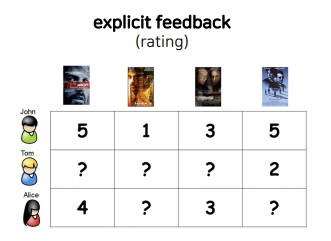

### SGD

가중치를 동시에 초기화

input = 행 - 사용자, 열 - 영화, 값 - 평점

output = 사용자가 보지 않은 영화의 평점을 추론하여 영화를 추천

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
movie_paths = '/content/drive/MyDrive/추천/data/movies/'

movie = pd.read_csv(movie_paths + "ratings.csv")
meta = pd.read_csv(movie_paths + 'movies_metadata.csv', low_memory=False)
meta = meta.rename(columns={'id':'movieId'})

In [ ]:
movie.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,movieId,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movie['movieId'] = movie['movieId'].astype(str)
meta['movieId'] = meta['movieId'].astype(str)

movie = pd.merge(movie, meta[['movieId', 'original_title']], on='movieId')
movie.head()

,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III


In [ ]:
df = movie.pivot_table(index='userId', columns = 'movieId', values = 'rating').fillna(0)
df.head()

movieId,100,100017,100032,100272,100450,101,101362,1018,101904,102,102165,1023,1024,103,103048,103210,103299,103502,103539,103688,103731,104,1040,104211,104241,104374,104863,1049,105,1050,1051,105121,105246,105254,105593,105763,1059,106417,107,107081,...,956,957,95744,95752,95949,95963,96,961,962,963,964,965,966,968,96821,97,97593,976,97936,97938,98,980,981,98122,982,98369,984,98491,986,98604,987,988,99,990,991,99106,992,994,996,99846
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
R = df.iloc[:, : ].values

In [ ]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

import numpy as np

# Base code : https://yamalab.tistory.com/92
class MatrixFactorization():
    def __init__(self, R, k, learning_rate, reg_param, epochs, verbose=False):
        """
        :param R: rating matrix
        :param k: latent parameter
        :param learning_rate: alpha on weight update
        :param reg_param: beta on weight update
        :param epochs: training epochs
        :param verbose: print status
        """
        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._learning_rate = learning_rate
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        """
        training Matrix Factorization : Update matrix latent weight and bias

        참고: self._b에 대한 설명
        - global bias: input R에서 평가가 매겨진 rating의 평균값을 global bias로 사용
        - 정규화 기능. 최종 rating에 음수가 들어가는 것 대신 latent feature에 음수가 포함되도록 해줌.

        :return: training_process
        """

        # init latent features
        self._P = np.random.normal(size=(self._num_users, self._k))
        self._Q = np.random.normal(size=(self._num_items, self._k))

        # init biases
        self._b_P = np.zeros(self._num_users)
        self._b_Q = np.zeros(self._num_items)
        self._b = np.mean(self._R[np.where(self._R != 0)])

        # train while epochs
        self._training_process = []
        for epoch in range(self._epochs):
            # rating이 존재하는 index를 기준으로 training
            xi, yi = self._R.nonzero()
            for i, j in zip(xi, yi):
                self.gradient_descent(i, j, self._R[i, j])
            cost = self.cost()
            self._training_process.append((epoch, cost))

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self):
        """
        compute root mean square error
        :return: rmse cost
        """

        # xi, yi: R[xi, yi]는 nonzero인 value를 의미한다.
        # 참고: http://codepractice.tistory.com/90
        xi, yi = self._R.nonzero()
        # predicted = self.get_complete_matrix()
        cost = 0
        for x, y in zip(xi, yi):
            cost += pow(self._R[x, y] - self.get_prediction(x, y), 2)
        return np.sqrt(cost/len(xi))


    def gradient(self, error, i, j):
        """
        gradient of latent feature for GD

        :param error: rating - prediction error
        :param i: user index
        :param j: item index
        :return: gradient of latent feature tuple
        """

        dp = (error * self._Q[j, :]) - (self._reg_param * self._P[i, :])
        dq = (error * self._P[i, :]) - (self._reg_param * self._Q[j, :])
        return dp, dq


    def gradient_descent(self, i, j, rating):
        """
        graident descent function

        :param i: user index of matrix
        :param j: item index of matrix
        :param rating: rating of (i,j)
        """

        # get error
        prediction = self.get_prediction(i, j)
        error = rating - prediction

        # update biases
        self._b_P[i] += self._learning_rate * (error - self._reg_param * self._b_P[i])
        self._b_Q[j] += self._learning_rate * (error - self._reg_param * self._b_Q[j])

        # update latent feature
        dp, dq = self.gradient(error, i, j)
        self._P[i, :] += self._learning_rate * dp
        self._Q[j, :] += self._learning_rate * dq


    def get_prediction(self, i, j):
        """
        get predicted rating: user_i, item_j
        :return: prediction of r_ij
        """
        return self._b + self._b_P[i] + self._b_Q[j] + self._P[i, :].dot(self._Q[j, :].T)


    def get_complete_matrix(self):
        """
        computer complete matrix PXQ + P.bias + Q.bias + global bias

        - PXQ 행렬에 b_P[:, np.newaxis]를 더하는 것은 각 열마다 bias를 더해주는 것
        - b_Q[np.newaxis:, ]를 더하는 것은 각 행마다 bias를 더해주는 것
        - b를 더하는 것은 각 element마다 bias를 더해주는 것

        - newaxis: 차원을 추가해줌. 1차원인 Latent들로 2차원의 R에 행/열 단위 연산을 해주기위해 차원을 추가하는 것.

        :return: complete matrix R^
        """
        return self._b + self._b_P[:, np.newaxis] + self._b_Q[np.newaxis:, ] + self._P.dot(self._Q.T)

In [ ]:
factorizer = MatrixFactorization(R, k=3, learning_rate=0.01, reg_param=0.01, epochs=100, verbose=True)
factorizer.fit()

Iteration: 10 ; cost = 0.8341
Iteration: 20 ; cost = 0.8074
Iteration: 30 ; cost = 0.7916
Iteration: 40 ; cost = 0.7789
Iteration: 50 ; cost = 0.7681
Iteration: 60 ; cost = 0.7586
Iteration: 70 ; cost = 0.7502
Iteration: 80 ; cost = 0.7429
Iteration: 90 ; cost = 0.7363
Iteration: 100 ; cost = 0.7306


In [ ]:
R

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
factorizer.get_complete_matrix()

array([[2.39563166, 1.74930765, 1.24809117, ..., 2.80052208, 1.81612915,
        2.81013474],
       [3.5164389 , 2.85180345, 2.95014439, ..., 3.96138126, 3.14120525,
        3.81285786],
       [4.89052362, 4.81619837, 3.30627145, ..., 2.66607157, 1.89491717,
        2.75301727],
       ...,
       [3.70262147, 3.08783214, 2.95125486, ..., 3.94584142, 3.08214603,
        3.75289806],
       [3.55411346, 2.79249382, 3.34985997, ..., 4.87603876, 3.60187204,
        2.03721604],
       [3.14783051, 2.22571234, 3.06300267, ..., 4.87674571, 3.9101293 ,
        3.91327632]])

### ALS

가중치를 순서대로 초기화

input = 행 - 사용자, 열 - 영화, 값 - 평점

output = 사용자가 보지 않은 영화의 평점을 추론하여 영화를 추천

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import warnings

warnings.filterwarnings(action='ignore')
%matplotlib inline

In [ ]:
movie_paths = '/content/drive/MyDrive/추천/data/movies/'

movie = pd.read_csv(movie_paths + "ratings.csv")
meta = pd.read_csv(movie_paths + 'movies_metadata.csv', low_memory=False)
meta = meta.rename(columns={'id':'movieId'})

In [ ]:
movie.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [ ]:
meta.head()

,adult,belongs_to_collection,budget,genres,homepage,movieId,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [ ]:
movie['movieId'] = movie['movieId'].astype(str)
meta['movieId'] = meta['movieId'].astype(str)

movie = pd.merge(movie, meta[['movieId', 'original_title']], on='movieId')
movie.head()

,userId,movieId,rating,timestamp,original_title
0,1,1371,2.5,1260759135,Rocky III
1,4,1371,4.0,949810302,Rocky III
2,7,1371,3.0,851869160,Rocky III
3,19,1371,4.0,855193404,Rocky III
4,21,1371,3.0,853852263,Rocky III


In [ ]:
df = movie.pivot_table(index='userId', columns = 'movieId', values = 'rating').fillna(0)
df.head()

movieId,100,100017,100032,100272,100450,101,101362,1018,101904,102,102165,1023,1024,103,103048,103210,103299,103502,103539,103688,103731,104,1040,104211,104241,104374,104863,1049,105,1050,1051,105121,105246,105254,105593,105763,1059,106417,107,107081,...,956,957,95744,95752,95949,95963,96,961,962,963,964,965,966,968,96821,97,97593,976,97936,97938,98,980,981,98122,982,98369,984,98491,986,98604,987,988,99,990,991,99106,992,994,996,99846
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
R = df.iloc[:, : ].values

In [ ]:
import numpy as np
from tqdm import tqdm_notebook as tqdm

# Base code : https://github.com/mickeykedia/Matrix-Factorization-ALS/blob/master/ALS%20Python%20Implementation.py
class AlternatingLeastSquares():
    def __init__(self, R, k, reg_param, epochs, verbose=False):
        """
        :param R: rating matrix
        :param k: latent parameter
        :param learning_rate: alpha on weight update
        :param reg_param: beta on weight update
        :param epochs: training epochs
        :param verbose: print status
        """
        self._R = R
        self._num_users, self._num_items = R.shape
        self._k = k
        self._reg_param = reg_param
        self._epochs = epochs
        self._verbose = verbose


    def fit(self):
        # init latent features
        self._users = np.random.normal(size=(self._num_users, self._k))
        self._items = np.random.normal(size=(self._num_items, self._k))

        # train while epochs
        self._training_process = []
        self._user_error = 0; self._item_error = 0; 
        for epoch in range(self._epochs):
            for i, Ri in enumerate(self._R):
                self._users[i] = self.user_latent(i, Ri)
                self._user_error = self.cost()
                
            for j, Rj in enumerate(self._R.T):
                self._items[j] = self.item_latent(j, Rj)
                self._item_error = self.cost()
                
            cost = self.cost()
            self._training_process.append((epoch, cost))

            # print status
            if self._verbose == True and ((epoch + 1) % 10 == 0):
                print("Iteration: %d ; cost = %.4f" % (epoch + 1, cost))


    def cost(self):
        """
        compute root mean square error
        :return: rmse cost
        """
        xi, yi = self._R.nonzero()
        cost = 0
        for x, y in zip(xi, yi):
            cost += pow(self._R[x, y] - self.get_prediction(x, y), 2)
        return np.sqrt(cost/len(xi))


    def user_latent(self, i, Ri):
        """
        :param error: rating - prediction error
        :param i: user index
        :param Ri: Rating of user index i
        :return: convergence value of user latent of i index
        """

        du = np.linalg.solve(np.dot(self._items.T, np.dot(np.diag(Ri), self._items)) + self._reg_param * np.eye(self._k),
                                   np.dot(self._items.T, np.dot(np.diag(Ri), self._R[i].T))).T
        return du

    def item_latent(self, j, Rj):
        """
        :param error: rating - prediction error
        :param j: item index
        :param Rj: Rating of item index j
        :return: convergence value of itemr latent of j index
        """

        di = np.linalg.solve(np.dot(self._users.T, np.dot(np.diag(Rj), self._users)) + self._reg_param * np.eye(self._k),
                                 np.dot(self._users.T, np.dot(np.diag(Rj), self._R[:, j])))
        return di


    def get_prediction(self, i, j):
        """
        get predicted rating: user_i, item_j
        :return: prediction of r_ij
        """
        return self._users[i, :].dot(self._items[j, :].T)


    def get_complete_matrix(self):
        """
        :return: complete matrix R^
        """
        return self._users.dot(self._items.T)

In [ ]:
# 속도가 매우느려 임의로 평점을 조정함
R = np.array([
    [1, 0, 0, 1, 3],
    [2, 0, 3, 1, 1],
    [1, 2, 0, 5, 0],
    [1, 0, 0, 4, 4],
    [2, 1, 5, 4, 0],
    [5, 1, 5, 4, 0],
    [0, 0, 0, 1, 0],
])

als = AlternatingLeastSquares(R = R, reg_param = 0.1, epochs=100, verbose=True, k=5)
als.fit()

Iteration: 10 ; cost = 0.0200
Iteration: 20 ; cost = 0.0166
Iteration: 30 ; cost = 0.0151
Iteration: 40 ; cost = 0.0145
Iteration: 50 ; cost = 0.0143
Iteration: 60 ; cost = 0.0143
Iteration: 70 ; cost = 0.0144
Iteration: 80 ; cost = 0.0146
Iteration: 90 ; cost = 0.0147
Iteration: 100 ; cost = 0.0148


In [ ]:
R

array([[1, 0, 0, 1, 3],
       [2, 0, 3, 1, 1],
       [1, 2, 0, 5, 0],
       [1, 0, 0, 4, 4],
       [2, 1, 5, 4, 0],
       [5, 1, 5, 4, 0],
       [0, 0, 0, 1, 0]])

In [ ]:
als.get_complete_matrix()

array([[ 0.99053917,  0.3100578 ,  1.01097062,  1.027693  ,  2.97420339],
       [ 1.99260444, -0.05728324,  2.9807566 ,  1.02478082,  1.00020902],
       [ 1.00184226,  1.97387914,  2.38603688,  4.98765392,  2.59747164],
       [ 1.01181648,  1.51901049,  2.24122549,  3.99156938,  3.98754542],
       [ 2.01519626,  1.01238285,  4.98771579,  3.99528795,  2.42583374],
       [ 4.98642764,  1.00193712,  5.00113259,  3.99713092,  3.0848964 ],
       [ 0.21991405,  0.37845909,  0.52443128,  0.98187058,  0.51760309]])

# 데이터 출처
- https://www.kaggle.com/chocozzz/t-academy-recommendation2


# 참고자료

- https://developers.google.com/machine-learning/recommendation?hl=ko

- https://tacademy.skplanet.com/live/player/onlineLectureDetail.action?seq=194

- https://www.youtube.com/watch?v=1fhNX_JFaow

- https://brunch.co.kr/@kakao-it/72#comment

- https://www.youtube.com/watch?v=h6vePourB7E&list=LL&index=1&t=15s

- https://ratsgo.github.io/generative%20model/2018/01/27/VAE/

- https://github.com/GunhoChoi/PyTorch-FastCampus/blob/master/08_Autoencoder/3_Variational_Autoencoder.ipynb

- https://ko-kr.facebook.com/groups/TensorFlowKR/permalink/524873987853664/

- https://doheelab.github.io/recommender-system/ncf_mlp/